In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
import seaborn as sns


Open Dataset in Pandas Dataframe

In [3]:
df = pd.read_csv("heart_disease.csv")
target = df.pop('HeartDiseaseorAttack')

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [5]:
# Convert the data into a format that can be used by TensorFlow
X_train = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

In [6]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
6342/6342 [==============================] - 21s 3ms/step - loss: 0.2551 - accuracy: 0.9053
Epoch 2/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2451 - accuracy: 0.9068
Epoch 3/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2422 - accuracy: 0.9073
Epoch 4/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2408 - accuracy: 0.9077
Epoch 5/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2400 - accuracy: 0.9075
Epoch 6/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2398 - accuracy: 0.9082
Epoch 7/10
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2396 - accuracy: 0.9077
Epoch 8/10
6342/6342 [==============================] - 13s 2ms/step - loss: 0.2393 - accuracy: 0.9077
Epoch 9/10
6342/6342 [==============================] - 12s 2ms/step - loss: 0.2392 - accuracy: 0.9077
Epoch 10/10
6342/6342 [==============================] - 13s 2ms/step - l

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

1586/1586 [==============================] - 3s 1ms/step - loss: 0.2373 - accuracy: 0.9085


In [10]:
predictions = model.predict(X_test)
# Convert the predictions to a binary class
predictions = (predictions > 0.5).astype(int)
predictions = [pred[0] for pred in predictions]
predictions = np.array(predictions)

1586/1586 [==============================] - 2s 1ms/step


In [11]:
y_true = y_test.numpy().astype(int)
test_acc = sum(predictions == y_true) / len(y_true)
Hc = sum(y_true == 0)
Sick = sum(y_true == 1)
PredHc = sum(predictions == 0)
PredSick = sum(predictions == 1)
print("Subjects:", len(y_true))
print("Actual Healthy Subjects:", Hc)
print("Actual Sick Subjects:", Sick)
print("Predicted Healthy Subjects:", Hc)
print("Predicted Sick Subjects:", Sick)
print("Test Set Accuracy:", test_acc)

Subjects: 50736
Actual Healthy Subjects: 45991
Actual Sick Subjects: 4745
Predicted Healthy Subjects: 45991
Predicted Sick Subjects: 4745
Test Set Accuracy: 0.9084673604541155


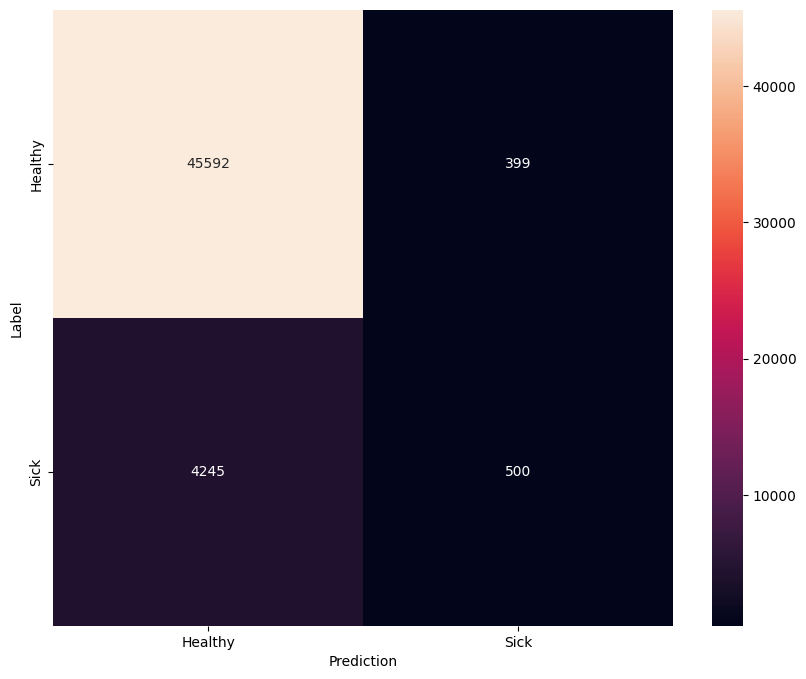

In [12]:
confusion_mtx = tf.math.confusion_matrix(y_test, predictions)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

High Accuracy, High Bias

Decission Tree Classifier, with and without K-Folds doubling the weight for Sick label

In [13]:
# Create the model
model = DecisionTreeClassifier()
# Create the KFold object with 5 folds
kfold = KFold(n_splits=5, shuffle=True)
# Initialize a list to store the evaluation metrics for each fold
eval_metrics = []

In [14]:
X = df.values
y = target.values
sample_weight = tf.where(y_train == 1, 2, 1)
# Iterate over the folds
for train_index, test_index in kfold.split(X):
    # Split the data into train and test sets for the current fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model on the train set
    model.fit(X_train, y_train, sample_weight=sample_weight)

     # Evaluate the model on the test set
    score = model.score(X_test, y_test)
    print(f'Test score: {score:.2f}')

# Calculate the mean and standard deviation of the evaluation metrics
mean_accuracy = np.mean([x[0] for x in eval_metrics])
std_accuracy = np.std([x[0] for x in eval_metrics])
mean_f1_score = np.mean([x[1] for x in eval_metrics])
std_f1_score = np.std([x[1] for x in eval_metrics])

print(f'Mean accuracy: {mean_accuracy:.3f} (+/- {std_accuracy:.3f})')
print(f'Mean F1 score: {mean_f1_score:.3f} (+/- {std_f1_score:.3f})')

Test score: 0.85
Test score: 0.85
Test score: 0.85
Test score: 0.85
Test score: 0.85
Mean accuracy: nan (+/- nan)
Mean F1 score: nan (+/- nan)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in do

In [15]:
# Fit the model to the training data
model.fit(X_train, y_train, sample_weight=sample_weight)

DecisionTreeClassifier()

In [16]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.85
F1 score: 0.26


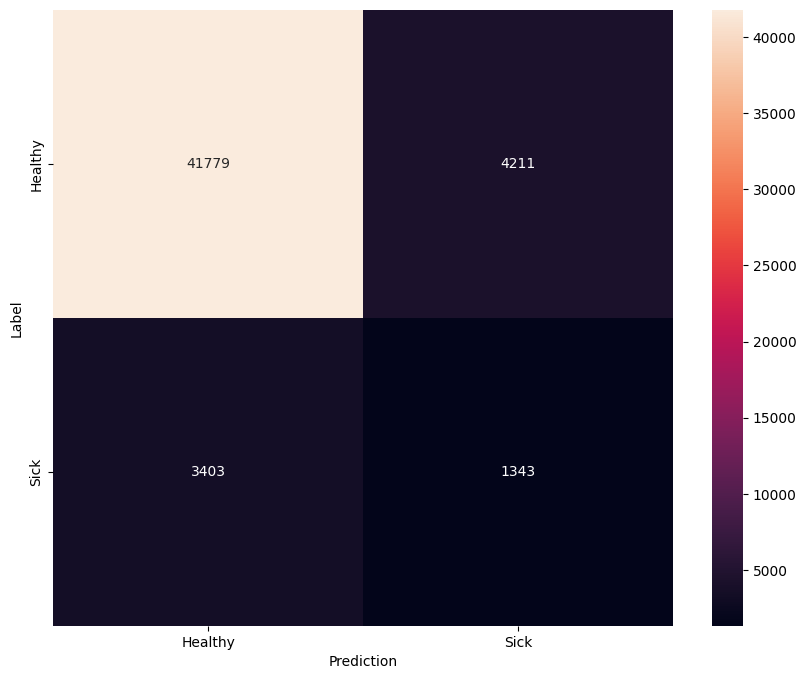

In [17]:
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

Lower accuracy and Lower Bias

In [18]:
# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [20]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [21]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9083688111005992


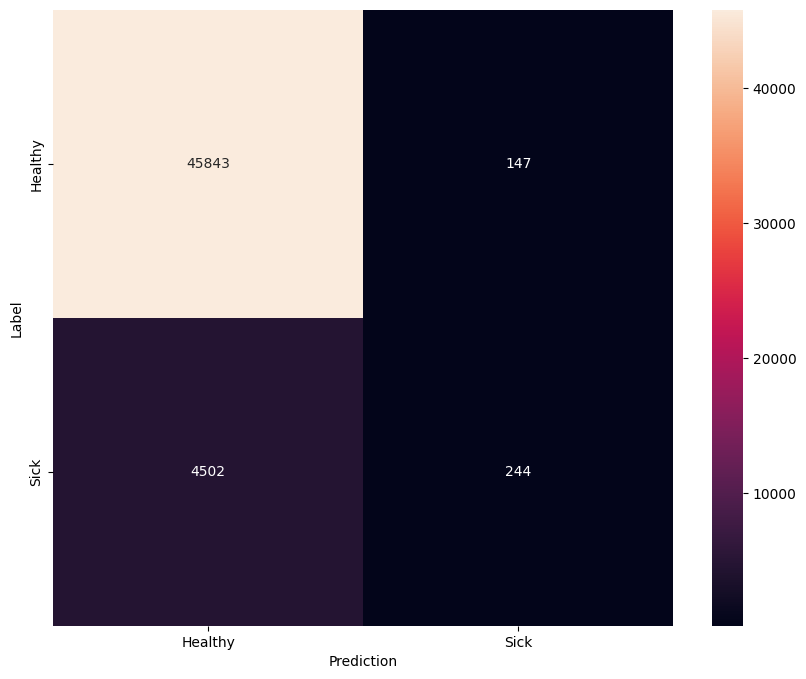

In [22]:
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

Neural Networks using SMOTE

In [24]:
X = df.values
y = target.values
# create a SMOTE object
smote = SMOTE()
# use the SMOTE object to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)
# split the resampled dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)
# Convert the data into a format that can be used by TensorFlow
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [25]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
11490/11490 [==============================] - 27s 2ms/step - loss: 0.4724 - accuracy: 0.7778
Epoch 2/10
11490/11490 [==============================] - 24s 2ms/step - loss: 0.4150 - accuracy: 0.8081
Epoch 3/10
11490/11490 [==============================] - 24s 2ms/step - loss: 0.3658 - accuracy: 0.8326
Epoch 4/10
11490/11490 [==============================] - 24s 2ms/step - loss: 0.3373 - accuracy: 0.8448
Epoch 5/10
11490/11490 [==============================] - 24s 2ms/step - loss: 0.3229 - accuracy: 0.8508
Epoch 6/10
11490/11490 [==============================] - 24s 2ms/step - loss: 0.3048 - accuracy: 0.8600
Epoch 7/10
11490/11490 [==============================] - 25s 2ms/step - loss: 0.2886 - accuracy: 0.8678
Epoch 8/10
11490/11490 [==============================] - 25s 2ms/step - loss: 0.2789 - accuracy: 0.8724
Epoch 9/10
11490/11490 [==============================] - 25s 2ms/step - loss: 0.2726 - accuracy: 0.8750
Epoch 10/10
11490/11490 [==============================

In [28]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

2873/2873 [==============================] - 5s 2ms/step - loss: 0.2769 - accuracy: 0.8706


In [29]:
predictions = model.predict(X_test)
# Convert the predictions to a binary class
predictions = (predictions > 0.5).astype(int)
predictions = [pred[0] for pred in predictions]
predictions = np.array(predictions)

2873/2873 [==============================] - 4s 1ms/step


In [30]:
y_true = y_test.numpy().astype(int)
test_acc = sum(predictions == y_true) / len(y_true)
Hc = sum(y_true == 0)
Sick = sum(y_true == 1)
PredHc = sum(predictions == 0)
PredSick = sum(predictions == 1)
print("Subjects:", len(y_true))
print("Actual Healthy Subjects:", Hc)
print("Actual Sick Subjects:", Sick)
print("Predicted Healthy Subjects:", Hc)
print("Predicted Sick Subjects:", Sick)
print("Test Set Accuracy:", test_acc)

Subjects: 91915
Actual Healthy Subjects: 45913
Actual Sick Subjects: 46002
Predicted Healthy Subjects: 45913
Predicted Sick Subjects: 46002
Test Set Accuracy: 0.8706087145732471


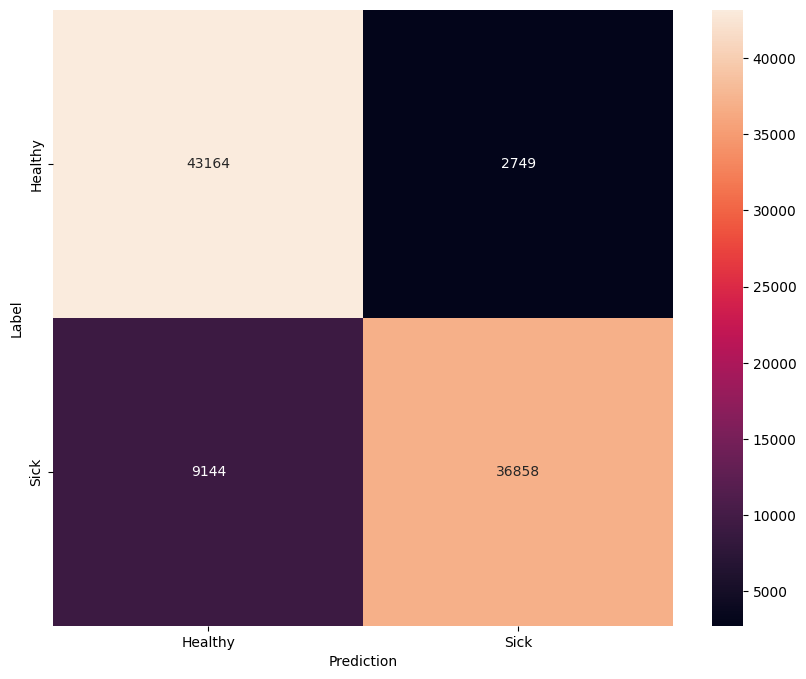

In [31]:
confusion_mtx = tf.math.confusion_matrix(y_test, predictions)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

Decent Accuracy and Low Bias

DECISSION TREE using SMOTE

In [32]:
# Create the model
model = DecisionTreeClassifier()

Using same SMOTED training and test datasets as Neural Networks

In [34]:
# Fit the model to the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.92
F1 score: 0.92


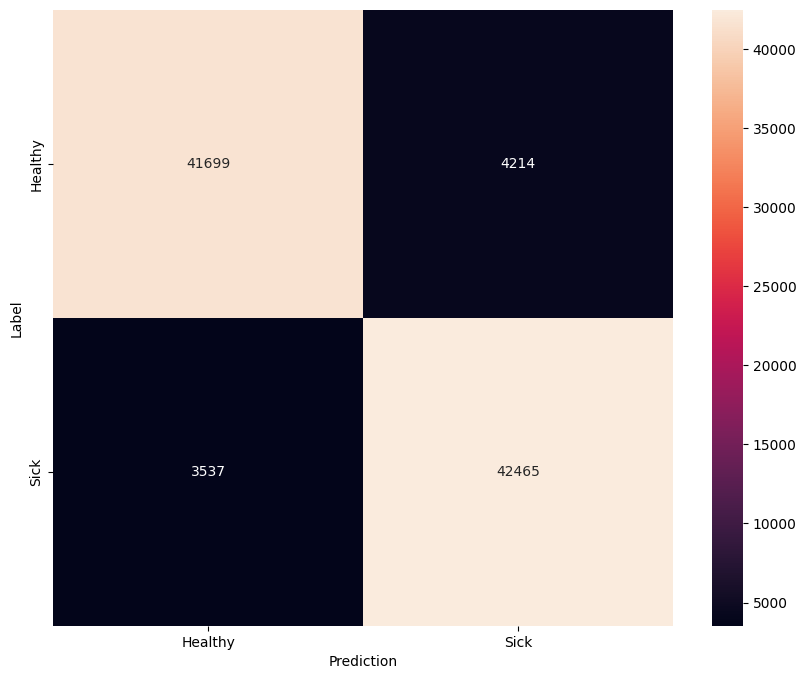

In [36]:
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

High Accuracy, even lower Bias

Random Forest using SMOTE

In [37]:
# Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10)

Same SMOTED Training and Test Datasets as DT and NN

In [38]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [39]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [40]:
# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9064352934776696


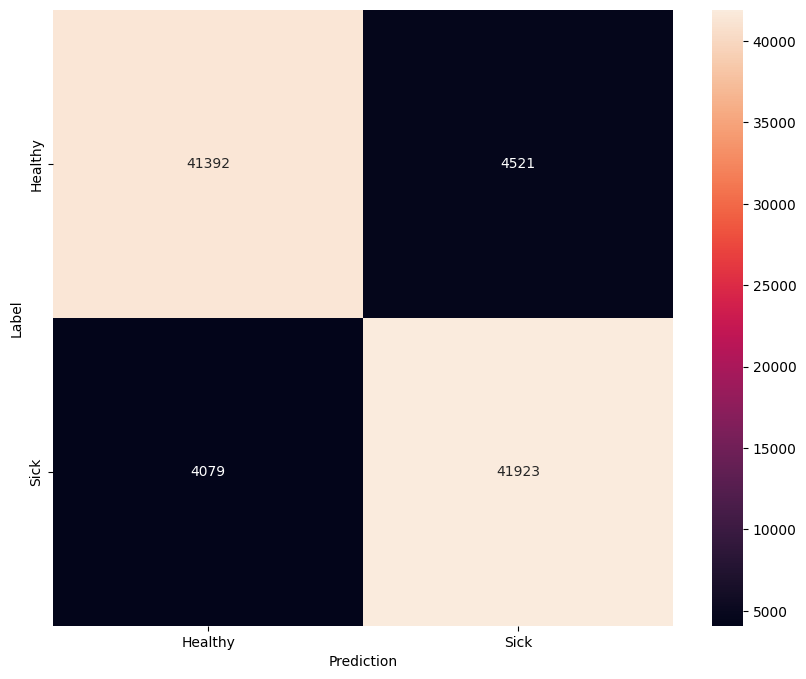

In [41]:
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
matriz = confusion_mtx.numpy()
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx,
xticklabels=['Healthy', 'Sick'],
yticklabels=['Healthy', 'Sick'],
annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

Similar result as Decission Trees